###Generall Analysis of all tweets
**Each data set here analized is collected from Twitter REST API searched for hashtags used in the days near manifestations against Dilma's government that happened in Brazil during August 16th, 2015**
- Graphs bellow show the amount of tweets for each hashtag, which are:
 - \#dilma
 - @dilma
 - pretrolao
 - foraPT
 - foraDilma
 - corrupcao
 - vemprarua
 
 


In [104]:
import io
import json
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import glob, os
from datetime import datetime
import matplotlib.dates as mdates

In [101]:
# Tweets by month.
%pylab inline
from datetime import datetime

def parse_date(datestring):
    """ Input, e.g., Mon Aug 24 19:41:14 +0000 2015
    Output, e.g., 24 """
    #Sat May 16 16:30:12 +0000 2015
    #print datestring
    parts = datestring.split()
    var = datetime.strptime(parts[1]+' ' +parts[2]+' '+ parts[5],'%b %d %Y')
    return var

Populating the interactive namespace from numpy and matplotlib


In [9]:
def tweets_by_month(tweets):
    #parsing date for all_tweets, positive and negative

    months = Counter(parse_date(x['created_at']) for x in tweets if parse_date(x['created_at']) > '15')#all
    months = sorted(months.items())
 
    values = [r[1] for r in months]
    keys = [r[0] for r in months]
    print 'All tweets', values, '.Total: ',sum(values)

    line, = plt.plot(keys, values,'bo-', label="Line ")#, linestyle='dotted')
    plt.xlabel('Days')
    plt.ylabel('# tweets')
    plt.title('Frequency of tweets')
    plt.legend([line], ["All tweets"], loc=0)



**Tweets vem pra rua - Come to the street**

All tweets [27509, 2894, 388, 394, 385, 210, 177, 252, 123] .Total:  32332


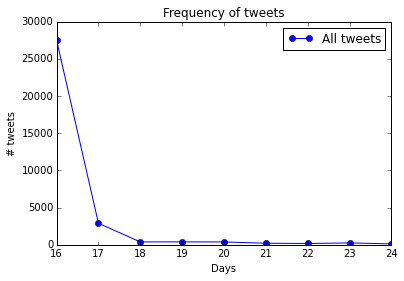

In [11]:
DIR = 'D:/TCC/Data/REST API/'
data = []

with io.open(DIR+'tweets_vemprarua.txt','r',encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))
        
tweets_by_month(data)

** Tweets #dilma**

All tweets [2485, 1174, 683, 679, 664, 490, 769, 463, 426] .Total:  7833


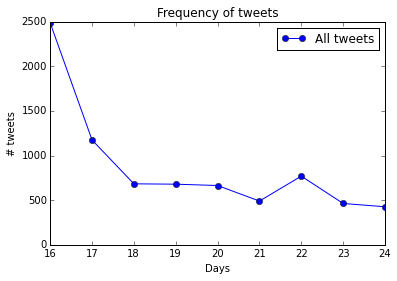

In [12]:
data_hashdilma = []
with io.open(DIR+'tweets#dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_hashdilma.append(json.loads(line))
        
tweets_by_month(data_hashdilma)

** Tweets @dilma**

All tweets [42, 209, 128, 25, 66, 57, 30, 22, 27] .Total:  606


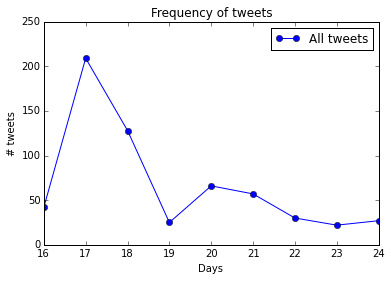

In [13]:
data_dilma_mentions = []
with io.open(DIR+'tweets@dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_dilma_mentions.append(json.loads(line))
        
tweets_by_month(data_dilma_mentions)

**Tweets mentioning "corrupção" (corruption)**

All tweets [29697, 17450, 10017, 14962, 16766, 11616, 7120, 5959, 4280] .Total:  117867


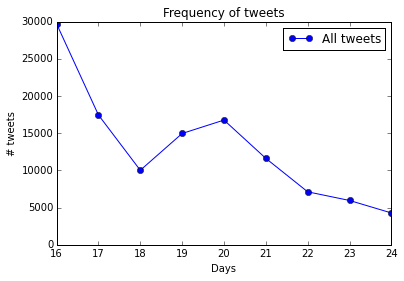

In [14]:
data_corrup = []
with io.open(DIR+'tweets_corrupcao.txt','r',encoding="utf-8") as f:
    for line in f:
        data_corrup.append(json.loads(line))
        
tweets_by_month(data_corrup)

**Tweets mentioning fora Dilma (Dilma out)**

All tweets [10569, 16599, 5038, 2791, 5489, 4664, 4038, 4484, 2403] .Total:  56075


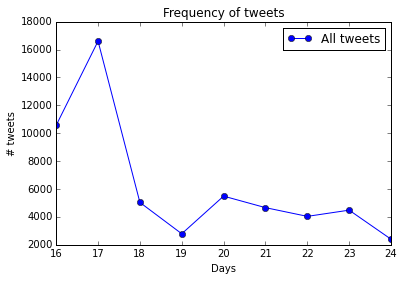

In [15]:
data_foraDilma = []
with io.open(DIR+'tweets_foraDilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_foraDilma.append(json.loads(line))
        
tweets_by_month(data_foraDilma)

** Tweets mentioning "petrolão"**

All tweets [1264, 584, 551, 615, 1132, 1081, 1607, 703, 448] .Total:  7985


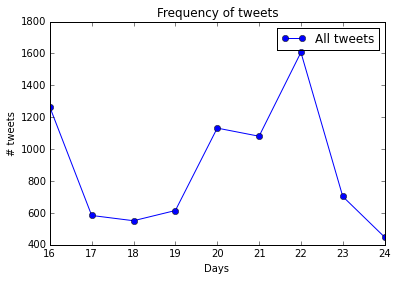

In [18]:
data_tweets_petrolao = []
with io.open(DIR+'tweets_petrolao.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_petrolao.append(json.loads(line))

tweets_by_month(data_tweets_petrolao)

** Tweets mentioning fora PT (PT out)** 
PT is Dilma's party 

All tweets [2193, 3516, 1891] .Total:  7600


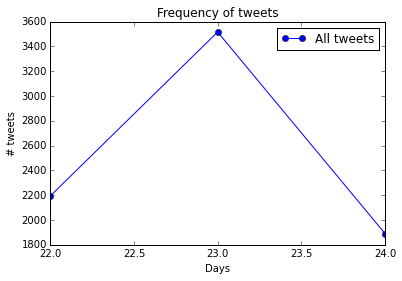

In [20]:
data_tweets_foraPT = []
with io.open(DIR+'tweets_foraPT.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_foraPT.append(json.loads(line))
        
tweets_by_month(data_tweets_foraPT)

##Timeline Analysis

Here we compute the first day on which users used one of the keywords (foraDilma(Dilma out), foraPT(PT out) and vemprarua(come to the street)) and plot a barchart with the distribution of activation (**"number of users" X "day of activation"**).

In [201]:
DIR = "D:/TCC/Data/Timeline/vemprarua/"


In [202]:
os.chdir(DIR)
date_ative = []
countuser = 0
user = []

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    with io.open(DIR+file,'r',encoding="utf-8") as f:
        for line in f:
            tweet= json.loads(line)
            
            if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:
                date_ative.append(tweet['created_at'])
                user.append(tweet['user']['screen_name'])
                break
            #else:
             #   print tweet['user']['screen_name']
        if tweet['user']['screen_name'] not in set(user):
            print tweet['user']['screen_name']
                
        countuser+=1
        
           
    #data_tweets_foraPT.append(json.loads(line))

In [ ]:
#if 'foraDILMA' in tweet['text'] or 'foradilma' in tweet['text'] or 'Fora Dilma' in tweet['text'] or 'foraDilma' in tweet['text'] or 'FORADILMA' in tweet['text'] or 'fora Dilma' in tweet['text'] or 'FORA DILMA' in tweet['text'] or 'ForaDilma' in tweet['text']:
#if 'foraPT' in tweet['text'] or 'FORAPT' in tweet['text'] or 'fora pt' in tweet['text']or 'FORA PT' in tweet['text'] or 'ForaPT' in tweet['text']:
#if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:


In [203]:
print "From", countuser," total users,", len(date_ative), "posted the keyword."
print date_ative[1]

From 117  total users, 117 posted the keyword.
Sun Aug 16 16:24:39 +0000 2015


In [204]:
from datetime import datetime

aa = sorted(Counter(parse_date(f)for f in date_ative if f.split()[5]!='2014').items())
print aa

values = [r[1] for r in aa]
print values, '\n'

keys = [r[0] for r in aa]
print keys

[(datetime.datetime(2015, 8, 12, 0, 0), 1), (datetime.datetime(2015, 8, 14, 0, 0), 4), (datetime.datetime(2015, 8, 15, 0, 0), 4), (datetime.datetime(2015, 8, 16, 0, 0), 64), (datetime.datetime(2015, 8, 17, 0, 0), 12), (datetime.datetime(2015, 8, 18, 0, 0), 6), (datetime.datetime(2015, 8, 19, 0, 0), 3), (datetime.datetime(2015, 8, 20, 0, 0), 3), (datetime.datetime(2015, 8, 21, 0, 0), 4), (datetime.datetime(2015, 8, 22, 0, 0), 1), (datetime.datetime(2015, 8, 23, 0, 0), 3), (datetime.datetime(2015, 8, 24, 0, 0), 6), (datetime.datetime(2015, 8, 25, 0, 0), 1), (datetime.datetime(2015, 8, 26, 0, 0), 4), (datetime.datetime(2015, 8, 27, 0, 0), 1)]
[1, 4, 4, 64, 12, 6, 3, 3, 4, 1, 3, 6, 1, 4, 1] 

[datetime.datetime(2015, 8, 12, 0, 0), datetime.datetime(2015, 8, 14, 0, 0), datetime.datetime(2015, 8, 15, 0, 0), datetime.datetime(2015, 8, 16, 0, 0), datetime.datetime(2015, 8, 17, 0, 0), datetime.datetime(2015, 8, 18, 0, 0), datetime.datetime(2015, 8, 19, 0, 0), datetime.datetime(2015, 8, 20, 0, 0

Populating the interactive namespace from numpy and matplotlib
[1, 4, 4, 64, 12, 6, 3, 3, 4, 1, 3, 6, 1, 4, 1]
117


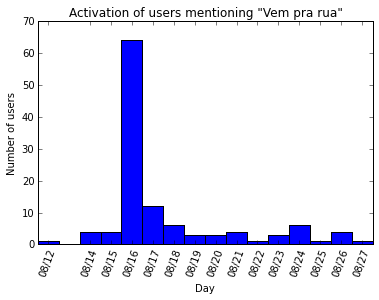

In [206]:
%pylab inline

counts = values
vals = keys
#print vals,'\n'
print counts
print sum(counts)

plt.bar(vals, counts, align='center',width=1)
plt.xticks(vals)
plt.xticks(rotation=70)
ax = plt.subplot(111)
ax.xaxis_date()

myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel('Day')
plt.ylabel('Number of users')
plt.title("Activation of users mentioning \"Vem pra rua\"")
plt.show()

In [201]:
import re
>>> import requests
url = "http://rds.eurozet.pl/reader/var/planeta.json"
response = requests.get(url)
json_data = response.content.partition('(')[-1].rpartition(')')[0]
songs = json.loads(json_data)

In [42]:
DIR = 'D:/TCC/Data/Before election/'
count = 0
with io.open(DIR+'2014_data.txt','r',encoding="utf-8") as f:
    for line in f:
        tweet = json.loads(line)
        if 'vemprarua' in tweet['text'] or 'VEMPRARUA' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VemPraRua' in tweet['text'] or 'vempraRua' in tweet['text']:

        #print data['text']
            count+=1
        #if count == 10000:
            #break
print count

198


In [ ]:
os.chdir(DIR)
date_ative = []
countuser = 0
user = []

for file in glob.glob("*.txt"):
    #print 'file ', file, '\n'
    with io.open(DIR+file,'r',encoding="utf-8") as f:
        for line in f:
            tweet= json.loads(line)
            print tweet['created_at'], tweet['text']
            
            #if 'vempraRua' in tweet['text'] or 'vemprarua' in tweet['text'] or 'vem pra rua' in tweet['text']or 'VEMPRARUA' in tweet['text'] or 'VemPraRua' in tweet['text']:
            #    date_ative.append(tweet['created_at'])
            #    user.append(tweet['user']['screen_name'])
            #    break
            #else:
             #   print tweet['user']['screen_name']
        #if tweet['user']['screen_name'] not in set(user):
         #   print tweet['user']['screen_name']
                
        #countuser+=1

Wed Sep 02 13:54:41 +0000 2015 @matheusbrazmatt  @MarthaFaria3  @lulainflado  @AmazonXXI  @PerolasdaDilma  @rairdefreitas  @n_rocas  @didigomes_  https://t.co/F2Nr7zlpXt
Wed Sep 02 13:41:38 +0000 2015 Grande e boa verdade hahaha @MarthaFaria3  @TheMattEspinosa  @LilyDMedeiros1  @didigomes_  @Jackeline_Motta   https://t.co/VW0FVBLM5f
Wed Sep 02 13:22:23 +0000 2015 Pixuleco mostrando para que veio @didigomes_  @Jackeline_Motta  @matheusbrazmatt  @pixuleco @LilyDMedeiros1  https://t.co/PLWFtfeIrp
Wed Sep 02 13:08:57 +0000 2015 @pixuleco @matheusbrazmatt @didigomes_ @Jackeline_Motta  @MarthaFaria3  @rairdefreitas  @vaniamarli15   https://t.co/ZVBBCRlMCq
Wed Sep 02 13:04:41 +0000 2015 @didigomes_  @Jackeline_Motta  @vaniamarli15  @vaniavannicc  @LilyDMedeiros1  @marcelvanhattem  https://t.co/ArEN6JA0Ri
Wed Sep 02 12:54:51 +0000 2015 @matheusbrazmatt  @rairdefreitas  @n_rocas  @PerolasdaDilma  #ForodeSPfarsaComunista #forapt  #ForaDilma   https://t.co/y4dGgiL0mj
Wed Sep 02 12:53:13 +0000 201

Populating the interactive namespace from numpy and matplotlib


In [91]:
test = parse_date('Sat May 16 16:30:12 +0000 2015')

In [90]:
# Tweets by month.
%pylab inline
from datetime import datetime
def parse_date(datestring):
    """ Input, e.g., Mon Aug 24 19:41:14 +0000 2015
    Output, e.g., 24 """
    #Sat May 16 16:30:12 +0000 2015
    #print datestring
    parts = datestring.split()
    var = datetime.strptime(parts[1]+' ' +parts[2]+' '+ parts[5],'%b %d %Y')
    return var

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [92]:
parse_date('Mon Aug 24 19:41:14 +0000 2015')


datetime.datetime(2015, 8, 24, 0, 0)

In [65]:
from datetime import datetime

date_object = datetime.strptime('Jun 1 2005', '%b %d %Y')

In [66]:
date_object

datetime.datetime(2005, 6, 1, 0, 0)

In [42]:
from dateutil import parser
dt = parser.parse("Aug 28 1999 12:00AM")

In [48]:
date_object.date()

datetime.date(2005, 6, 1)

In [131]:
dt.date().month

8